Корреляция по Пирсону: -0.9999999999999998


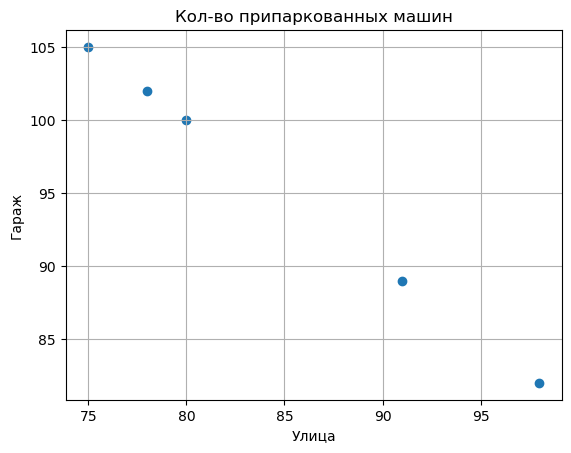

In [1]:
import numpy as np
import matplotlib.pyplot as plt

street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

correlation_matrix = np.corrcoef(street, garage)
pearson_coefficient = correlation_matrix[0, 1]
print("Корреляция по Пирсону:", pearson_coefficient)

plt.scatter(street, garage)
plt.grid(True)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.title("Кол-во припаркованных машин")
plt.show()

In [1]:
import pandas as pd
from scipy.stats import linregress

df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)

df['age_years'] = df['age']//365
names_todrop = ['age', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
df.drop(names_todrop, axis=1, inplace=True)
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

FileNotFoundError: [Errno 2] No such file or directory: 'cardio_train.csv'

Наклон: 0.16594353090603092
Сдвиг: 152.04527435951022
MSE: 61.698532979146485


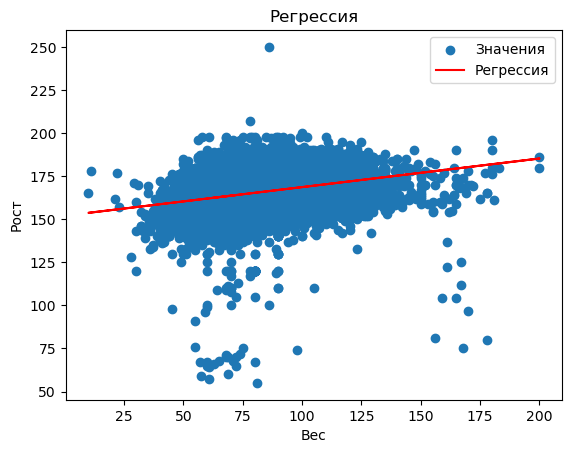

In [3]:
x = df['weight']
y = df['height']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

predicted_y = slope * x + intercept

mse = np.mean((predicted_y - y)**2)

print('Наклон:', slope)
print('Сдвиг:', intercept)
print('MSE:', mse)

plt.scatter(x, y, label='Значения')

plt.plot(x, predicted_y, color='red', label='Регрессия')

plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('Регрессия')

plt.legend()

plt.show()

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('insurance.csv')
print(df.head())
print(df.info())
print(df['region'].unique())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
data1 = df[df['region'] == 'southwest']['bmi']
data2 = df[df['region'] == 'southeast']['bmi']
data3 = df[df['region'] == 'northwest']['bmi']
data4 = df[df['region'] == 'northeast']['bmi']
fvalue, pvalue = stats.f_oneway(data1, data2, data3, data4)
print(f'Статистика: {fvalue}, p-значение: {pvalue}')

Статистика: 39.49505720170283, p-значение: 1.881838913929143e-24


In [6]:
model = ols('bmi ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(region)   4055.880631     3.0  39.495057  1.881839e-24
Residual   45664.319755  1334.0        NaN           NaN


In [7]:
from scipy.stats import ttest_ind

regions = df['region'].unique()
p_values = {}

for i in range(len(regions)):
    for j in range(i+1, len(regions)):
        region1 = regions[i]
        region2 = regions[j]
        group1 = df[df['region'] == region1]['bmi']
        group2 = df[df['region'] == region2]['bmi']
        
        t_stat, p_value = ttest_ind(group1, group2)
        print(f'Значения для {region1, region2} стат: {t_stat}, p-знач: {p_value}')
print(f'Поправка Бонферрони: {0.05/6}')

Значения для ('southwest', 'southeast') стат: -5.908373821545118, p-знач: 5.4374009639680636e-09
Значения для ('southwest', 'northwest') стат: 3.2844171500398582, p-знач: 0.001076958496307695
Значения для ('southwest', 'northeast') стат: 3.1169000930045923, p-знач: 0.0019086161671573072
Значения для ('southeast', 'northwest') стат: 9.25649013552548, p-знач: 2.643571405230106e-19
Значения для ('southeast', 'northeast') стат: 8.790905562598699, p-знач: 1.186014937424813e-17
Значения для ('northwest', 'northeast') стат: 0.060307727183293185, p-знач: 0.951929170821864
Поправка Бонферрони: 0.008333333333333333


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


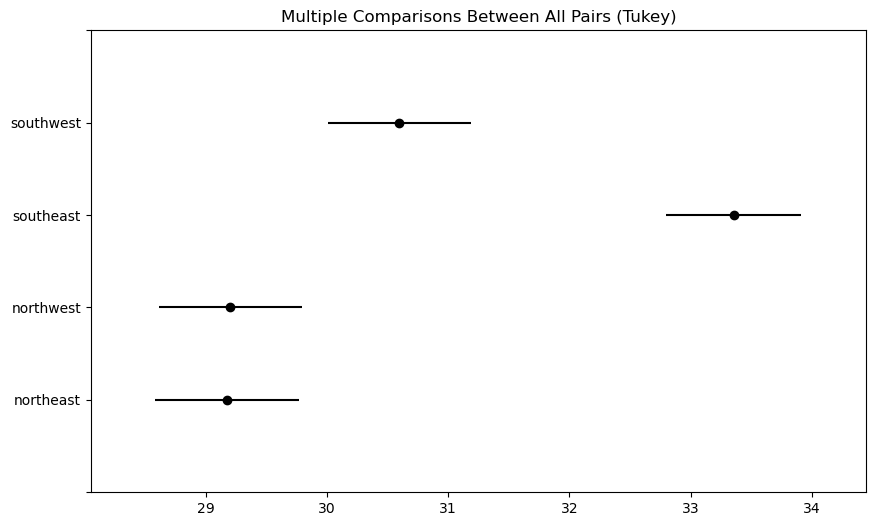

In [8]:
tukey_results = pairwise_tukeyhsd(df['bmi'], df['region'], alpha=0.05)
tukey_results.plot_simultaneous()
print(tukey_results)

In [9]:
model = ols('bmi ~ region + sex + region:sex', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq      df          F        PR(>F)
region       4034.975135     3.0  39.398134  2.163195e-24
sex            86.007035     1.0   2.519359  1.126940e-01
region:sex    174.157808     3.0   1.700504  1.650655e-01
Residual    45404.154911  1330.0        NaN           NaN


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
northeastfemale   northeastmale  -0.2998 0.9998 -2.2706  1.6711  False
northeastfemale northwestfemale  -0.0464    1.0 -2.0142  1.9215  False
northeastfemale   northwestmale  -0.2042    1.0 -2.1811  1.7728  False
northeastfemale southeastfemale   3.3469    0.0    1.41  5.2839   True
northeastfemale   southeastmale   4.6657    0.0  2.7634   6.568   True
northeastfemale southwestfemale   0.7362 0.9497 -1.2377    2.71  False
northeastfemale   southwestmale   1.8051 0.1007 -0.1657   3.776  False
  northeastmale northwestfemale   0.2534 0.9999 -1.7083  2.2152  False
  northeastmale   northwestmale   0.0956    1.0 -1.8752  2.0665  False
  northeastmale southeastfemale   3.6467    0.0  1.7159  5.5775   True
  northeastmale   southeastmale   4.9655    0.0  3.0695  6.8614   True
  nort

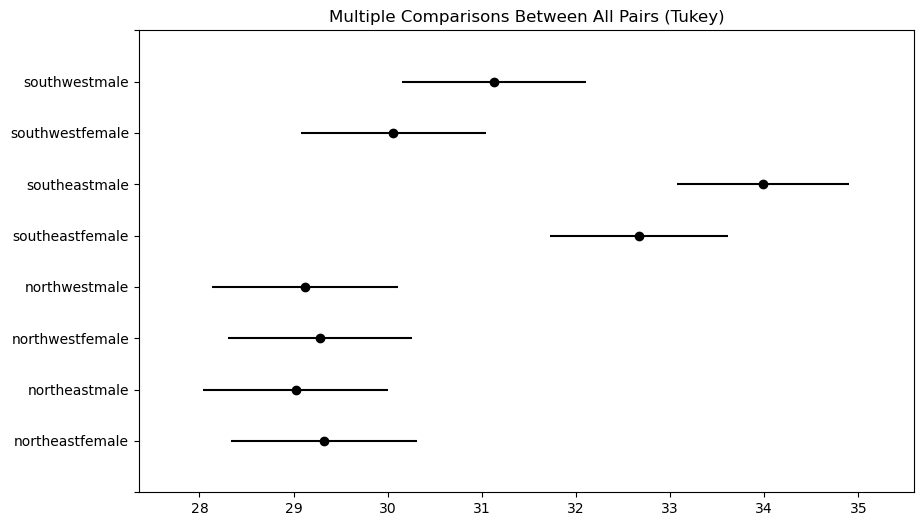

In [10]:
tukey_results = pairwise_tukeyhsd(df['bmi'], df['region'] + df['sex'], alpha=0.05)
tukey_results.plot_simultaneous()
print(tukey_results)